In [52]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [53]:
data = pd.read_csv('multiple_linear_regression.csv')
data.head(10)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [55]:
data = data.dropna() 
data.shape

(200, 4)

In [56]:
# splitting input 
x  = data.iloc[: , data.columns != "Target"]
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [57]:
# output 
y = data.loc[: , "Target"] 
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [58]:
# splitting dataset into training dataset and testing dataset using sklearn 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.30 , random_state = 43) 

In [59]:
x_train.shape 

(140, 3)

In [60]:
x_test.shape 

(60, 3)

In [61]:
y_train.shape 

(140,)

In [62]:
y_test.shape 

(60,)

<h1 style="color : gray ; font-weight : 500; ">Linear Regression</h1>

<h2 style="color : dimgray;">Training</h2>

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(x_train, y_train ) 

LinearRegression()

In [64]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [65]:
lr.intercept_

3.077774495528047

<h2 style="color : dimgray ; " >Prediction</h2>

In [66]:
pred_value = lr.predict(x_test) 


<h2 style="color : dimgray ; " >Cost</h2>

In [67]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, pred_value)
cost 

2.241286253093347

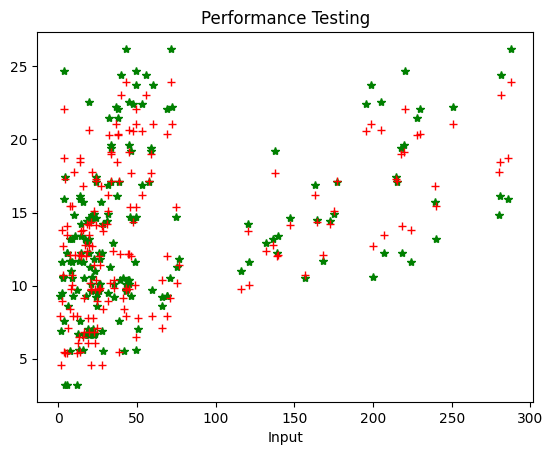

In [68]:
# plotting actual data set ---> green 
plt.plot(x_test , y_test , '*', color = "green")
# plotting predicted data set ---> red 
plt.plot(x_test, pred_value , '+', color = 'red') 
plt.title('Performance Testing') 
plt.xlabel('Input') 
plt.show()

<h2 style="color : dimgray ; font-weight : bold ; ">Assumptions in Linear Regression</h2>

<h2 style="color : dimgray ; ">1. Homoscedasticity</h2>
<h4 style="color : dimgray; ">There is no co-relation between residuals and predicted value, prediction should be unbiased.</h4>

In [69]:
pred_value 

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

In [70]:
y_test 

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
116    12.2
138     9.6
155     3.2
82     11.3
160    14.4
181    12.2
171    14.5
12      9.2
55     23.7
77     14.2
22      5.6
129     9.7
105    19.2
102    14.8
159    12.9
9      10.6
15     22.4
150    16.1
76      6.9
119     6.6
Name: Target, dtype: float64

In [71]:
residuals = y_test - pred_value 

In [72]:
residuals

56    -2.917101
37    -0.661461
67     1.313807
79     1.240469
80     0.422008
188   -2.835263
183    2.258416
10     1.480683
128    2.633938
62    -1.131729
65     1.368841
17     1.327562
133    0.442702
195    2.123225
146   -2.221023
38     0.277943
173   -0.380236
149    0.339051
93     1.122823
29     1.360550
0      1.737942
2     -2.738627
122   -2.180821
180   -0.232255
95     0.699385
121   -0.770427
185    1.974879
39     1.180337
66     0.527340
19     0.462538
11     0.116186
45    -0.238272
41    -0.083768
92     0.366254
168   -0.039522
1     -1.746705
57     0.418405
189    0.618645
151    1.533650
167   -1.289216
116    0.184502
138   -0.101073
155   -2.153987
82     1.150338
160    0.175804
181   -1.847809
171    0.169465
12    -1.194657
55     2.655820
77     0.452965
22    -0.865117
129    1.794492
105    1.501334
102   -2.946682
159    0.505011
9     -2.093458
15     1.810533
150   -2.326901
76     2.308544
119   -0.221298
Name: Target, dtype: float64

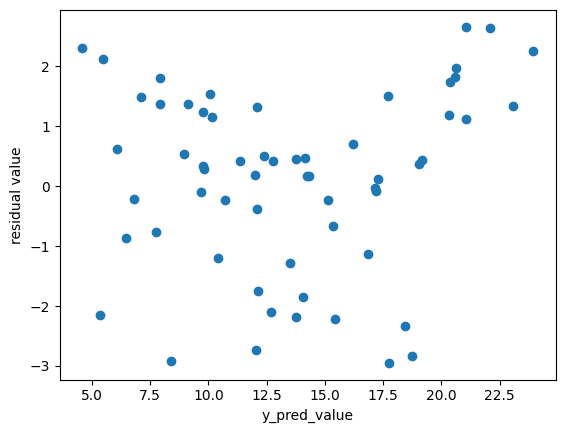

In [73]:
plt.scatter(pred_value , residuals ) 
plt.xlabel('y_pred_value')
plt.ylabel('residual value')
plt.show()

<h2 style="color : dimgray ; ">2. Normality of the Residuals</h2>
<h4 style="color : dimgray; ">Most of the errors lies near zero.</h4>

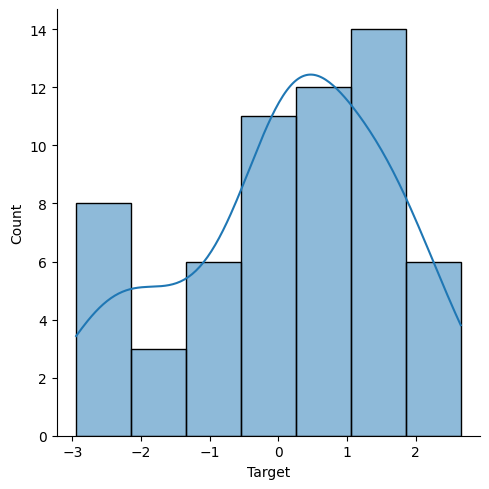

In [75]:
sns.displot(residuals, kde = True )
# below kernel density line shows the normal distribution curve 

<h2 style="color : dimgray ; font-weight : bold ; ">Ordinary Least Square ( OLS  ) Method </h2>

In [77]:
import statsmodels.api as sm 

In [78]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [79]:
model = sm.OLS(y_train, x_with_constant)

In [80]:
result = model.fit()

In [81]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [82]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [83]:
lr.intercept_

3.077774495528047

In [84]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           1.67e-63
Time:                        16:35:06   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

<h2 style="color : dimgray ; font-weight : bold ; ">Important Stats from the Summary</h2>
<h4 style="color : dimgray ; ">
1. <span style="font-weight : 700; ">R<sup>2</sup>-Test</span> : <br/>if R-square is 1 it is the best fit and if its closer to zero it is worse fit and baseline/worst fit at Zero .
</h4>
<h4 style="color : dimgray ; ">
2. <span style="font-weight : 700; ">F-Test</span> : <br/>Evaluating p-value to reject or accept Null Hypothesis 
</h4>
<h4 style="color : dimgray ; ">
3. <span style="font-weight : 700; ">T-Test</span> : <br/>Evaluating p-value for multiple parameters to reject or accept Null Hypothesis for the parameter that is grater than or less than 0.5. If p-value is greater than 0.5 then remove that parameter and train_model again. 
</h4>

### From the above OLS Regression results it can be seen that p-value for Feature 3 is grater than 0.5 that is 0.780. Then remove the Feature 3 as it is not significant for model performance. 